In [3]:
# settings
import matplotlib.pyplot as plt
import numpy as np
%matplotlib qt5
import scipy, scipy.stats
plt.rcParams['figure.figsize'] = (8.0, 4.0)
from ipywidgets import interact, fixed
%matplotlib inline

$\usepackage{amssymb} \newcommand{\R}{\mathbb{R}} \newcommand{\vx}{\vec{x}} \newcommand{\vy}{\vec{y}} \newcommand{\vw}{\vec{w}} \newcommand{\Wc}{{\bf W}_c}$

# 5. Data visualization

## 5.1 Motivation

** Goal:** 
Transformation of high-dimensional data spaces (which are difficult to depict) into our familiar perceptual spaces
* visual: visualization
* auditory: sonification
* tactile: haptualization / tactile interfaces

**Reasons/Motivation**:
* a comprehensive automatization of structure discovery is unrealistic in the foreseeable future
* pattern recognition capabilities of the human eye/visual system (ditto: ear/auditory systen) are so far not reached by any technical system.
* Data Mining can roughly by divided into the steps:
 1. Exploratory Data Analysis
 2. Confirmative Data Analysis
* Before we can confirm a structure we first need to know what we are looking for.
* Visualization (Sonification etc.) supports the hypothesis generation within (1.)
* The visual system is not only a tool, but also a model: it somehow 'compresses' or condenses subsymbolic light patterns into robustly emerging objects that are recognized and remembered and allows their characterization in terms of material, position, grouping, etc.

## 5.2. Elementary Visualization techniques
(we will look at these using a test data set building.csv)

In [43]:
# load data
data = np.loadtxt("data/building.csv", delimiter=",", usecols=range(1,18))

nonbin_data = np.concatenate((data[:,7:9], data[:,10:]),axis=1)
weekdays = np.array([np.where(x==1)[0][0] for x in data])
color_vals = "bgrcmyk"
colorlist = [color_vals[day] for day in weekdays]
colorlist_weekend = ["r" if day in [5,6] else "b" for day in weekdays]

modulo_num = 20
reduced_data = np.array([x for i, x in enumerate(nonbin_data) if i % modulo_num == 0])
reduced_clist = [x for i, x in enumerate(colorlist) if i % modulo_num == 0]

### Description
This dataset is problem A of the 'Great energy predictor shootout' contest. Try to predict the hourly consumption of electrical energy, hot water, and cold water, based on the day, time of day, outside temperature, outside air humidity, solar radiation and wind speed!

### Features
* The dataset consists of:
 * 14 inputs: 
  * day (7 binary)
  * time (2 float + 1 binary)
  * temp, humid, solar, wind (1 float each)
 * 3 outputs: 
  * electrical
  * cold water consumption
  * hot water consumption (1 float each)
4208 records of 17 features

### column details
* 0: monday, binary 
* 1: tuesday, binary 
* 2: wednesday, binary 
* 3: thursday, binary 
* 4: friday, binary 
* 5: saturday, binary 
* 6: sunday, binary 
* 7: hour_from_noon, scaled to [0...1]
* 8: hour, scaled to [-1...1]
* 9: am_pm, binary 
* 10: temperature, float [0...1]
* 11: humidity, float [0...1]
* 12: solar_radiation, float [0...1]
* 13: wind_speed, float [0...1]
* 14: hc_wb_electrical, float [0.26...0.69]
* 15: hc_wb_cold_water, float [0.08...0.68]
* 16: hc_wb_hot_water, float [0.08...0.73]

### Scatter plots: Projection of data on few selected axes 
* +: good for the recognition of clusters
* -: unsuitable for binary attributes
* front end (output medium) for many data preprocessing techniques, e.g. 
 * Principal Component Analysis for decorrelation
 * Multidimensional Scaling (next chapter)
 * many more...

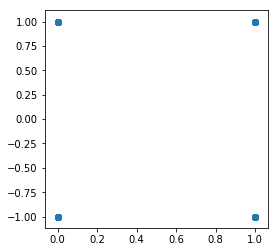

In [47]:
plt.rcParams['figure.figsize'] = (4.0, 4.0)
# binary features: only points at corners
plt.scatter(data[:,0], data[:,9], alpha=0.01); 

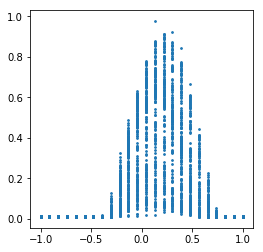

In [15]:
# plot solar radiation against hour in day: makes sense
plt.scatter(data[:,8], data[:, 12], s=3); 

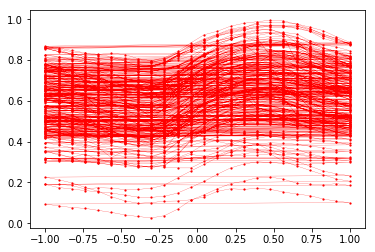

In [53]:
# plot temperature over hour in day: interesting!
plt.rcParams['figure.figsize'] = (6.0, 4.0)
plt.plot(data[:,8], data[:, 10], 'ro-', lw=0.2, ms=1.2);

* it can be seen that the temperature changes smoothly with time - yet we get 'right-to-left-lines'
* more (topologically) correct would be to plot this on a cylindersurface

* so let's try and discover... (3D plots with mplot3d)

In [54]:
# attention: need to switch from inline plot to plot window: worst case: restart kernel
# and execute %pylab qt5 first, then load data again

%matplotlib qt5

In [55]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = np.cos(data[:,8]*np.pi)
ys = np.sin(data[:,8]*np.pi)
zs = data[:,10]
ax.plot3D(xs, ys, zs, '-', lw=0.5)
ax.plot3D(0.5*xs, 0.5*ys, data[:,12], 'r-', lw=0.5)
ax.set_xlabel('cos(t)')
ax.set_ylabel('sin(t)')
ax.set_zlabel('blue: T, red: solar_rad')
plt.show();

In [57]:
%matplotlib inline

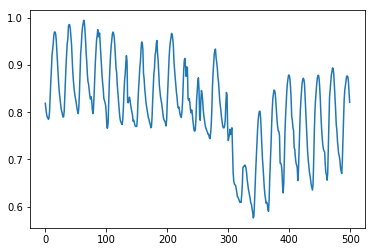

In [65]:
plt.plot(data[:500, 10], '-');

In [60]:
4000/24

166.66666666666666

* apparently the data are a time series and we see the weather (here temperature) changes over time

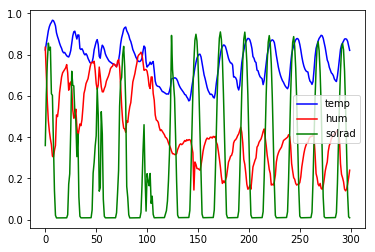

In [24]:
plt.plot(data[200:500, 10], 'b-', label='temp')
plt.plot(data[200:500, 11], 'r-', label='hum')
plt.plot(data[200:500, 12], 'g-', label='solrad')
plt.legend();

* we see that we can learn quite a bit more than just by looking at numbers...
* plotting is a very powerful tool for understanding your data

* Obvious extension: Global overview by using a grid of $d \times d$ scatter plots

In [25]:
def scatter_plot_matrix(data, colorlist):
    assert(len(data) == len(colorlist)), "Lengths of colorlist and data are not equal"
    plt.clf()
    dims = data.shape[1]
    for i in range(dims):
        for j in range(dims):
            plt.subplot(dims, dims, i*dims + j + 1)
            if i == j:
                plt.hist(data[:,i])
            else:
                plt.scatter(data[:,i], data[:,j], color = colorlist, s=0.5)
            plt.xticks([])
            plt.yticks([])
    plt.show()

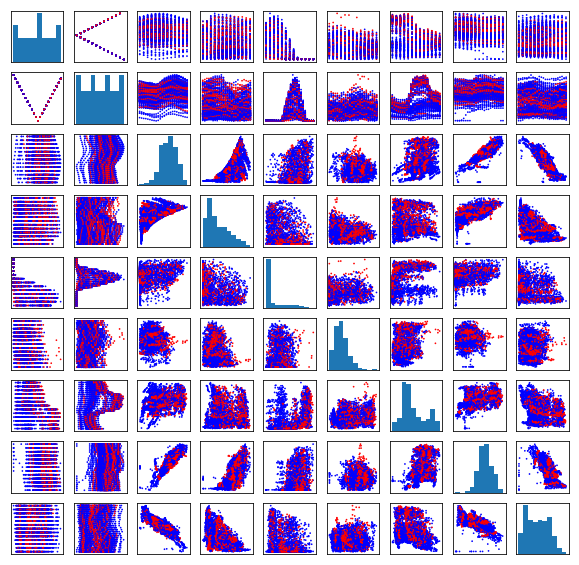

In [27]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
#scatter_plot_matrix(reduced_data, reduced_clist)
scatter_plot_matrix(nonbin_data, colorlist_weekend)

* Variation: $q \times q$ matrix of the first $q$ eigenvector projections
* usually: showing feature histograms along the diagonal
* limited applicability (for $d > 20$)

In [68]:
def PCA(data, dims):
    assert(data.shape[1] > dims), "dims has to be smaller than the number of columns in data"
    cov = np.cov(data.T)
    eig_val, eig_vec = np.linalg.eig(cov)
    print(eig_val)
    return np.dot(eig_vec[:dims], data.T).T

[ 0.37037044  0.11485078  0.0745162   0.02586278  0.01522266  0.00860867
  0.00560097  0.00088324  0.00287977]


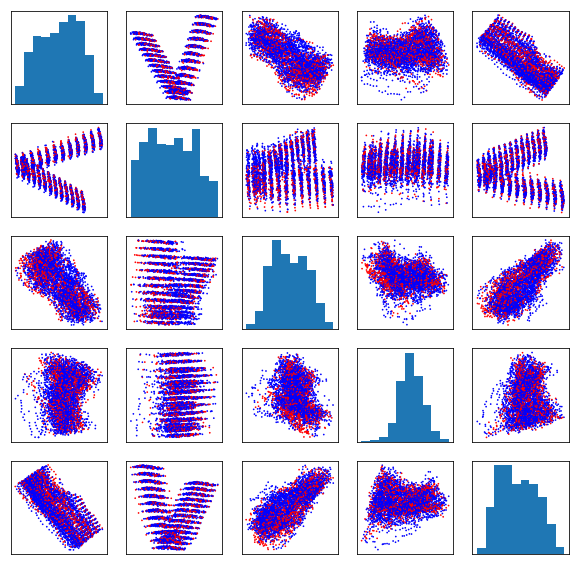

In [69]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
pca_data = PCA(nonbin_data, 5)
scatter_plot_matrix(pca_data, colorlist_weekend)

### Glyphs
* Visualization of several data dimensions with help of geometric attributes or color

* [--] risk of confusion for $d>6$ and rotations
 * a pattern may look similar to a rotated pattern since we are tolerant to rotations
* [-] induces an artificial neighborhood between attributes
* [+] treats all attributes in principle equal
Example (from website internal use only)
<img src="images/starglyphs-towns-from-KaliumTech.gif" width="50%">

### Histograms

* are nothing but special glyphs, with a standard usual mapping
 * usually: bin lengths = frequency of occurrance of points within the discretization bin

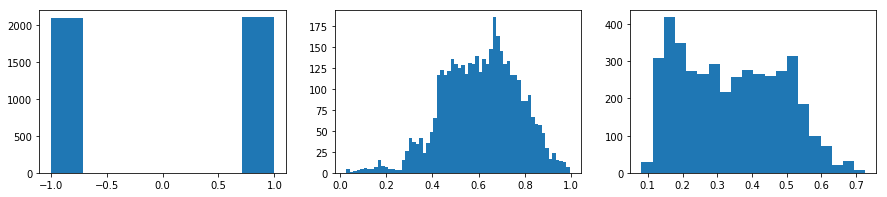

In [31]:
plt.rcParams['figure.figsize'] = (15.0, 3.0)
plt.subplot(131); plt.hist(data[:,9], 7) # am_pm
plt.subplot(132); plt.hist(data[:,10], int(np.sqrt(4200))) # temperature
plt.subplot(133); plt.hist(data[:,16],20); # hot water use

* alternative utilization: representing a single data point feature $k$ value $x_k$ as the $k$th bin

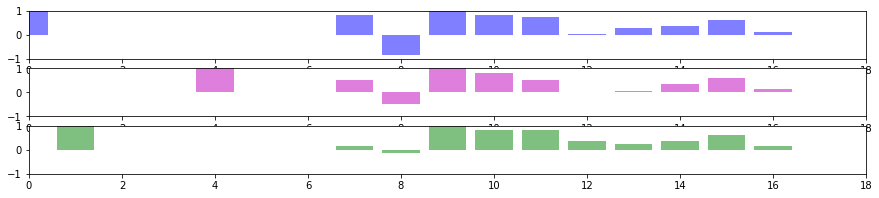

In [32]:
for k in range(3):
    plt.subplot(3,1,k+1); 
    plt.bar(range(17), data[100*k,:], color=colorlist[100*k], alpha=0.5) 
    plt.axis([0,18,-1,1]);

### Chernoff-Faces
* Mapping of Data features to Object properties 
* historically introduced with faces as parameterized objects that have dedicated properties
 * e.g. size of eyes, shape of mouth, size of ears, width and height 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/17/Chernoff_faces_for_evaluations_of_US_judges.svg/720px-Chernoff_faces_for_evaluations_of_US_judges.svg.png" width="60%"> 

* [+] connects to our gestalt recognition
* [-] features are possibly different salient (e.g. mouth shape is more salient than ear size)
* [-] features are not treated equally, giving a certain bias for different aspects of the data
* [.] faces possess an emotional component

From <http://mars.wiwi.hu-berlin.de/mediawiki/teachwiki/index.php/Analysis_of_Percentage_of_Bodyfat>:
<img src="http://mars.wiwi.hu-berlin.de/mediawiki/teachwiki/images/f/f5/Chernoff-Flury_Faces.jpg" width="100%">
* From the output of Chernoff-Flury Faces(right), it is obvious to find that the 39th and 182nd observations are far different from the others, especially the 39th. 
* We should note that, how the differences among faces would be like is largely due to how the variables are allocated to different parts of the face. 

### Parallel Coordinates

* Representation of a data point as line train between parallel arranged coordinate axes

In [33]:
def parallel_coordinates(data, colorlist):
    assert(len(data) == len(colorlist)), "Lengths of colorlist and data are not equal"
    plt.clf()
    for i, x in enumerate(data):
        plt.plot(range(len(x)), x, c=colorlist[i], alpha=0.25)
    plt.show()

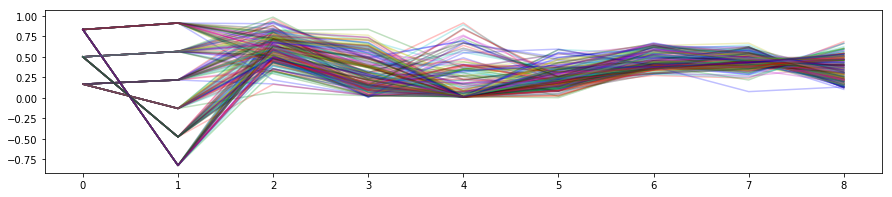

In [34]:
parallel_coordinates(reduced_data, reduced_clist)

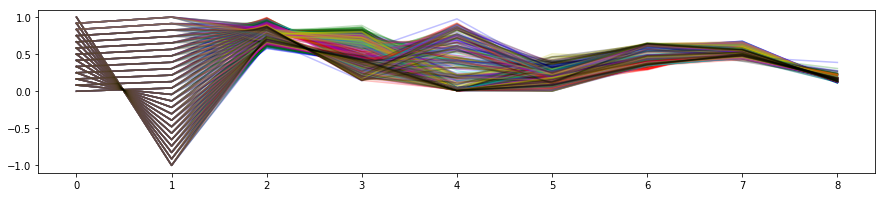

In [35]:
parallel_coordinates(nonbin_data[0:500:1,:], colorlist[0:500:1])

* a data set becomes a batch of lines 
 * this helps to quickly recognize common trails, corresponding to clusters
* color of lines can be used to mark certain classes, so this can be used for clustering
* [+] all features are treated equally 
* [-] a neighborhood between features is suggested which is not really factual

###  Color coding 
* maximal 3 dimensions can be mapped on color axes
* according to the color space dimensions can be R(ed), G(reen), B(lau), H(ue) S(aturation) I(ntensity), etc.
* can be combined with other methods, e.g. Scatter plots or glyphs
* [-] there are couplings between features, e.g. saturation=0% will render the hue value invisible

### Box Plots 
* Summary of probability distributions via structured glyphs
* presented: minimum, 10%-Quantiles, $\sigma$-interval, median, mean, 90%-Quantiel, maximum
<img src="images/boxplot.png" width="30%">


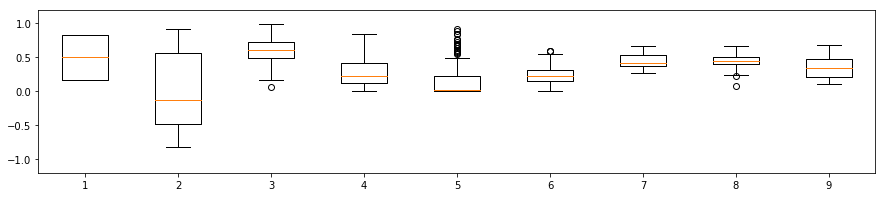

In [36]:
plt.boxplot(reduced_data)
# plt.boxplot(data)
plt.ylim((-1.2, 1.2))
plt.show()

### Dimensional Stacking
* Definition of a dimension order (slow to fast) (e.g. $x_1, x_2, x_3, x_4$)
* Discretize in $n_k$ intervals along axes $k, k=1,\dots,d-2$ 
* Example: $d=4, n_1=n_2=2 \to$ 2 intervals for each axes $x_1,x_2$
* graphical representation is recursively defined 
 * if $d=2 \Rightarrow$ normal xy-plot
 * else: for $d=3,\dots,2n-1$
  * splitting along a $n_d \times n_{d-1}$ subfield matrix 
 * i.e. $n_1$ slices along dimension $x_1$ and $n_2$ slices along $x_2$ are made and the data within a slice cuboid are recursively divided and plotted 
<img src="images/dimstack.png" width="50%">

In [37]:
def _dimensional_stacking(data, colorlist, minimum, maximum, dim0, dim1, dim2, min1, max1, min2, max2):
    if maximum < minimum:
        maximum = minimum
    bools = np.logical_and(data[:,dim0] >= minimum, data[:,dim0] <= maximum)
    temp_d = data[bools]
    if(len(colorlist) == len(data)):
        temp_c = np.array(colorlist)[bools]
    else:
        temp_c = colorlist
    plt.scatter(temp_d[:,dim1], temp_d[:,dim2], color = temp_c)
    plt.xlim((min1-.1,max1+.1))
    plt.ylim((min2-.1,max2+.1))
    
def dimensional_stacking(data, colorlist, dim0, dim1, dim2):
    assert(data.shape[1] > 2), "data has to have more than 2 columns"
    min0, max0 = np.min(data[:,dim0]), np.max(data[:,dim0])
    min1, max1 = np.min(data[:,dim1]), np.max(data[:,dim1])
    min2, max2 = np.min(data[:,dim2]), np.max(data[:,dim2])
    plt.clf()
    for i in range(10):
        plt.subplot(2, 5, i+1)
        minimum = min0 + 0.1*i*(max0-min0)
        maximum = min0 + 0.1*(i+1)*(max0-min0)
        _dimensional_stacking(data, colorlist, minimum, maximum, dim0, dim1, dim2, min1, max1, min2, max2)

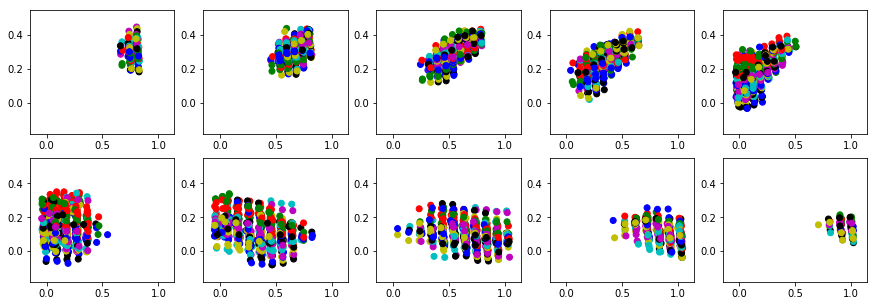

In [39]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)
dimensional_stacking(pca_data, colorlist, 0, 1, 2)
#dimensional_stacking(pca_data, "b")

In [42]:
used_data = pca_data
#used_data = nonbin_data
used_colorlist = colorlist
#used_colorlist = colorlist_weekend
#used_colorlist = "b"
data_dim = (0,used_data.shape[1]-1,1)
abs_min = np.min(used_data)
abs_max = np.max(used_data)

def _interact_dim_stacking(dim0, x_dim, y_dim, minimum, maximum):
    min1, max1 = np.min(used_data[:,x_dim]), np.max(used_data[:,x_dim])
    min2, max2 = np.min(used_data[:,y_dim]), np.max(used_data[:,y_dim])
    _dimensional_stacking(used_data, used_colorlist, minimum, maximum, 
                          dim0, x_dim, y_dim, min1, max1, min2, max2)
interact(_interact_dim_stacking, dim0=data_dim, x_dim = data_dim, 
         y_dim = data_dim, minimum = (abs_min, abs_max), 
         maximum = (abs_min, abs_max));

interactive(children=(IntSlider(value=2, description='dim0', max=4), IntSlider(value=2, description='x_dim', m…

### Brushing
* geometrically defined data sets are highlighted
* Example: two coupled plots $P_1(x_1, x_2)$ and $P_2(x_3, x_4)$
* Moving the Mouse in plot $P_1$ accentuates all data in plot $P_2$ which are 'around' the Mouse pointer.